## **Data Mining Project - Deliverable 1**

Student ID 1: 20250422

Student ID 2:

Student ID 3: 

we can put this in here or in the end of the notebook

This project focus on an Exploratory Data Analysis, following the CRISP-DM Methodology

## Business Understanding

Goal: Segment customers of Amazing International Airlines Inc. to identify behaviorally and economically distinct groups.
Business questions:
 - Who are the high-value frequent travelers?
 - Which groups are at risk of churn?
 - How can we personalize marketing based on income, loyalty, or travel habits?

Success criteria:
 - Segments are interpretable (demographic, behavioral, value-based)
 - Each segment supports specific business actions (targeted offers, retention strategy)

For this we have two available datasets: 

- DM_AIAI_CustomerDB.csv : with information regarding the costumers on the loyalty program

- DM_AIAI_FlightsDB.csv : with information regarding the costumers' flying activity with AIAI Airlines

## Data Understanding

In [56]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from math import ceil

In [6]:

customerDB = pd.read_csv('DM_AIAI_CustomerDB.csv')
flightsDB = pd.read_csv('DM_AIAI_FlightsDB.csv')
metadata = pd.read_csv('DM_AIAI_Metadata.csv', sep=';') # this file is not comma separated but semicolon separated

In [7]:
display(metadata)

,CustomerDB,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Variable,Description,NaN
1,NaN,Loyalty#,Unique customer identifier for loyalty program...,NaN
2,NaN,First Name,Customer's first name,NaN
3,NaN,Last Name,Customer's last name,NaN
4,NaN,Customer Name,Customer's full name (concatenated),NaN
5,NaN,Country,Customer's country of residence,NaN
6,NaN,Province or State,Customer's province or state,NaN
7,NaN,City,Customer's city of residence,NaN
8,NaN,Latitude,Geographic latitude coordinate of customer loc...,NaN
9,NaN,Longitude,Geographic longitude coordinate of customer lo...,NaN


Loyalty is the costumer identifier so it should be the index for our datasets.

**Analyzing CustomerDB**

In [8]:
customerDB.head()

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,...,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion


In [9]:
customerDB.columns

Index(['Unnamed: 0', 'Loyalty#', 'First Name', 'Last Name', 'Customer Name',
       'Country', 'Province or State', 'City', 'Latitude', 'Longitude',
       'Postal code', 'Gender', 'Education', 'Location Code', 'Income',
       'Marital Status', 'LoyaltyStatus', 'EnrollmentDateOpening',
       'CancellationDate', 'Customer Lifetime Value', 'EnrollmentType'],
      dtype='object')

In [10]:
customerDB.shape

(16921, 21)

In [11]:
customerDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               16921 non-null  int64  
 1   Loyalty#                 16921 non-null  int64  
 2   First Name               16921 non-null  object 
 3   Last Name                16921 non-null  object 
 4   Customer Name            16921 non-null  object 
 5   Country                  16921 non-null  object 
 6   Province or State        16921 non-null  object 
 7   City                     16921 non-null  object 
 8   Latitude                 16921 non-null  float64
 9   Longitude                16921 non-null  float64
 10  Postal code              16921 non-null  object 
 11  Gender                   16921 non-null  object 
 12  Education                16921 non-null  object 
 13  Location Code            16921 non-null  object 
 14  Income                

The data types seem to be correct, let's examine the null values:

In [12]:
print(customerDB.isnull().sum())

Unnamed: 0                     0
Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64


**CancellationDate column:**

- Missingness: Not random

- Reason: Customer never cancelled : meaningful

- Treatment: No imputation needed


**Customer Lifetime Value column:**

- Missingness: Not random

- Reason: seems to be new customers with no history

- Treatment: Could impute with mean/median or predictive model or drop rows


**Income column:**

- Missingness: Random

- Reason: Customer did not provide or data not collected

- Treatment: Can impute with median or regression model or drop rows

In [13]:
income_null = customerDB[customerDB['Income'].isnull()]
income_null.head()

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
16901,0,999987,Layla,Murphy,Layla Murphy,Canada,New Brunswick,Fredericton,46.029263,-66.565150,...,female,Bachelor,Urban,NaN,Single,Star,3/7/2017,3/7/2017,NaN,Standard
16902,1,999988,Jana,Parker,Jana Parker,Canada,Quebec,Montreal,45.573672,-73.523012,...,male,College,Rural,NaN,Single,Star,8/22/2017,8/22/2017,NaN,Standard
16903,2,999989,Ethan,Parker,Ethan Parker,Canada,Ontario,Trenton,44.075379,-77.550375,...,male,College,Rural,NaN,Married,Star,9/12/2015,9/12/2015,NaN,Standard
16904,3,999990,Ryan,Anderson,Ryan Anderson,Canada,New Brunswick,Moncton,46.106617,-64.714267,...,female,College,Rural,NaN,Married,Star,6/10/2019,6/10/2019,NaN,Standard
16905,4,999991,Olivia,Cote,Olivia Cote,Canada,New Brunswick,Fredericton,45.950000,-66.652437,...,female,College,Suburban,NaN,Married,Star,7/20/2019,7/20/2019,NaN,Standard


In [14]:
value_null = customerDB[customerDB['Customer Lifetime Value'].isnull()]
value_null.head()

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
16901,0,999987,Layla,Murphy,Layla Murphy,Canada,New Brunswick,Fredericton,46.029263,-66.565150,...,female,Bachelor,Urban,NaN,Single,Star,3/7/2017,3/7/2017,NaN,Standard
16902,1,999988,Jana,Parker,Jana Parker,Canada,Quebec,Montreal,45.573672,-73.523012,...,male,College,Rural,NaN,Single,Star,8/22/2017,8/22/2017,NaN,Standard
16903,2,999989,Ethan,Parker,Ethan Parker,Canada,Ontario,Trenton,44.075379,-77.550375,...,male,College,Rural,NaN,Married,Star,9/12/2015,9/12/2015,NaN,Standard
16904,3,999990,Ryan,Anderson,Ryan Anderson,Canada,New Brunswick,Moncton,46.106617,-64.714267,...,female,College,Rural,NaN,Married,Star,6/10/2019,6/10/2019,NaN,Standard
16905,4,999991,Olivia,Cote,Olivia Cote,Canada,New Brunswick,Fredericton,45.950000,-66.652437,...,female,College,Suburban,NaN,Married,Star,7/20/2019,7/20/2019,NaN,Standard


In [15]:
#confirm that the rows with null-values for this columns are the same ones
income_null['Loyalty#'].unique() == value_null['Loyalty#'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

We noticed that, the missing values from 'Income' and 'Customer Lifetime Value' are the same. By analyzing the rest of the data, we can see that the 'EnrollmentDateOpening' and 'CancellationDate' are the same which means that this 20 customers have gotten into the program on the same day they cancelled the program and also entered by the Standard mode.

For a double-check before deciding to drop the rows, we will check if these Loyaty#'s have any activity in the FlightsDB.

If they do not have any information in FlightsDB, since they didn't spend even a day in the program and have restricted information, we are are going to drop these rows in Data Preparation.

**Check for duplicates**

In [16]:
#check for duplicated rows
customerDB.duplicated().sum()

np.int64(0)

We have no total duplicates. 

Check duplicates in 'Unnamed: 0 'and 'Loyalty#':

In [17]:
customerDB.duplicated(subset='Unnamed: 0').sum()

np.int64(20)

In [18]:
unnamed_duplicates = customerDB[customerDB.duplicated(subset='Unnamed: 0')]
unnamed_duplicates

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
16901,0,999987,Layla,Murphy,Layla Murphy,Canada,New Brunswick,Fredericton,46.029263,-66.565150,...,female,Bachelor,Urban,NaN,Single,Star,3/7/2017,3/7/2017,NaN,Standard
16902,1,999988,Jana,Parker,Jana Parker,Canada,Quebec,Montreal,45.573672,-73.523012,...,male,College,Rural,NaN,Single,Star,8/22/2017,8/22/2017,NaN,Standard
16903,2,999989,Ethan,Parker,Ethan Parker,Canada,Ontario,Trenton,44.075379,-77.550375,...,male,College,Rural,NaN,Married,Star,9/12/2015,9/12/2015,NaN,Standard
16904,3,999990,Ryan,Anderson,Ryan Anderson,Canada,New Brunswick,Moncton,46.106617,-64.714267,...,female,College,Rural,NaN,Married,Star,6/10/2019,6/10/2019,NaN,Standard
16905,4,999991,Olivia,Cote,Olivia Cote,Canada,New Brunswick,Fredericton,45.950000,-66.652437,...,female,College,Suburban,NaN,Married,Star,7/20/2019,7/20/2019,NaN,Standard
16906,5,999992,Ella,Roy,Ella Roy,Canada,Ontario,Toronto,43.706878,-79.437412,...,male,College,Suburban,NaN,Single,Star,3/27/2021,3/27/2021,NaN,Standard
16907,6,999993,Elijah,Cook,Elijah Cook,Canada,British Columbia,Dawson Creek,55.701475,-120.181716,...,female,College,Suburban,NaN,Married,Star,1/27/2015,1/27/2015,NaN,Standard
16908,7,999994,Ethan,Chan,Ethan Chan,Canada,Ontario,Ottawa,45.365906,-75.723181,...,female,College,Rural,NaN,Married,Star,5/5/2016,5/5/2016,NaN,Standard
16909,8,999995,Liam,Wong,Liam Wong,Canada,Ontario,Ottawa,45.471557,-75.704868,...,female,College,Suburban,NaN,Married,Star,3/2/2020,3/2/2020,NaN,Standard
16910,9,999996,Isabella,Ross,Isabella Ross,Canada,Ontario,Toronto,43.690489,-79.436758,...,female,Bachelor,Suburban,NaN,Single,Star,9/14/2018,9/14/2018,NaN,Standard


We have 16921 observations in the costumers data set. It seems that after row 16900, the index/'Unnamed: 0' started again at 0. There are duplicates but if we look closer, they are the same exact rows as the ones with the null-values in 'Income' and 'Customer Lifetime Value':

In [19]:
#confirm that the duplicated rows for 'Unnamed: 0' are the same ones as for 'Customer Lifetime Value',
#and also for 'Income' since they are the same as checked before
unnamed_duplicates['Loyalty#'].unique() == value_null['Loyalty#'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

Check if these Loyaty#'s have activity in the FlightsDB:

In [20]:
columns_incorrect_index = unnamed_duplicates['Loyalty#'].unique()
columns_incorrect_index

array([999987, 999988, 999989, 999990, 999991, 999992, 999993, 999994,
       999995, 999996, 999997, 999998, 999999, 100017, 100011, 100012,
       100013, 100014, 100015, 100016])

In [21]:
flightsDB[flightsDB['Loyalty#'].isin(columns_incorrect_index)]

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed


Since there are no rows, these customers have no activity with this company. With all this analysis we decided to drop the these rows because they don't give us any relevant information for clustering.

In [22]:
customerDB.duplicated(subset='Loyalty#').sum()

np.int64(164)

In [23]:
customerDB[customerDB.duplicated(subset='Loyalty#')]

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
370,370,354438,Marla,Heinicke,Marla Heinicke,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,Bachelor,Rural,34640.0,Married,Star,7/11/2015,NaN,4530.53,Standard
1986,1986,687951,Burma,Cordill,Burma Cordill,Canada,Quebec,Montreal,45.501690,-73.567253,...,male,Bachelor,Rural,37751.0,Single,Aurora,7/29/2021,NaN,7249.07,Standard
2322,2322,615439,Thalia,Cabos,Thalia Cabos,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,Bachelor,Urban,44698.0,Married,Aurora,10/21/2017,NaN,7918.33,Standard
2416,2416,156031,Onie,Grech,Onie Grech,Canada,Quebec,Montreal,45.501690,-73.567253,...,female,Bachelor,Urban,50825.0,Married,Aurora,5/24/2019,NaN,8092.88,Standard
2442,2442,825593,Rose,Mcgregor,Rose Mcgregor,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,High School or Below,Suburban,24992.0,Married,Aurora,5/18/2020,NaN,8139.00,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16488,16488,373638,Sherryl,Vanduyn,Sherryl Vanduyn,Canada,Quebec,Tremblant,46.118462,-74.596184,...,female,College,Rural,0.0,Single,Star,7/30/2021,NaN,18898.33,Standard
16625,16625,727507,Marnie,Kisner,Marnie Kisner,Canada,Alberta,Banff,51.178398,-115.570800,...,male,Bachelor,Suburban,93011.0,Divorced,Star,12/26/2020,NaN,22643.83,Standard
16766,16766,278854,Marylee,Villicana,Marylee Villicana,Canada,Quebec,Tremblant,46.118462,-74.596184,...,female,High School or Below,Urban,20799.0,Single,Star,8/16/2017,NaN,28328.47,Standard
16775,16775,434807,Cira,Nalley,Cira Nalley,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,Bachelor,Rural,35296.0,Single,Star,8/27/2015,NaN,29194.37,Standard


In [24]:
customerDB[customerDB['Loyalty#'] == 368073]

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
5003,5003,368073,Rufus,Dannenberg,Rufus Dannenberg,Canada,Quebec,Montreal,45.501690,-73.567253,...,female,Doctor,Suburban,19447.0,Married,Nova,3/27/2020,NaN,3336.22,Standard
16881,16881,368073,Enedina,Dickason,Enedina Dickason,Canada,Quebec,Quebec City,46.813877,-71.207977,...,male,Bachelor,Urban,66661.0,Single,Star,3/20/2018,NaN,42561.63,Standard


With this information we can see that, there are 164 duplicates and they don't belong neither to the same customer neither do they belong to related people (different Last Names and different cities).

We will com back to this topic in more detail after analyzing the FlightsDB, to check for relationships between features that can help us come up with a solution.

In [25]:
customerDB.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,16921.0,8440.023639,4884.775439,0.000000,4210.000000,8440.000000,12670.000000,16900.000000
Loyalty#,16921.0,550197.393771,259251.503597,100011.000000,326823.000000,550896.000000,772438.000000,999999.000000
Latitude,16921.0,47.174500,3.307971,42.984924,44.231171,46.087818,49.282730,60.721188
Longitude,16921.0,-91.814768,22.242429,-135.056840,-120.237660,-79.383186,-74.596184,-52.712578
Income,16901.0,37758.038400,30368.992499,0.000000,0.000000,34161.000000,62396.000000,99981.000000
Customer Lifetime Value,16901.0,7990.460188,6863.173093,1898.010000,3979.720000,5780.180000,8945.690000,83325.380000


In 'Income' column we can see that at least 25% of customers in the Loyaty Program have Income equal to 0. We can analyze if they are either unemployed or students further on.

In [26]:
customerDB.describe(include=['object']).T

,count,unique,top,freq
First Name,16921,4941,Stacey,13
Last Name,16921,15404,Ypina,4
Customer Name,16921,16921,Emma Martin,1
Country,16921,1,Canada,16921
Province or State,16921,11,Ontario,5468
City,16921,29,Toronto,3390
Postal code,16921,75,V6E 3D9,917
Gender,16921,2,female,8497
Education,16921,5,Bachelor,10586
Location Code,16921,3,Suburban,5716


Observations:

- Female/Masculine customers are well distributed.

- A big percentage of customers have a Bachelor degree.

- More than half of the customers are married.

- Almost half of customers are in the LoyaltyStatus 'Star'. Are the remaining associated with very high income? can we create a group by this?

In [27]:
#check for unique values in categorical features
costumers_categories = ['Country', 'Province or State','City', 'Gender', 'Education', 'Marital Status', 'LoyaltyStatus', 'EnrollmentType']

for feat in costumers_categories:
    print(f'{feat}:')
    print(customerDB[feat].unique())

Country:
['Canada']
Province or State:
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
City:
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Moncton' 'Fredericton' 'Ottawa' 'Tremblant'
 'Calgary' 'Whistler' 'Thunder Bay' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Victoria' 'Regina' 'Kelowna'
 "St. John's" 'Kingston' 'Banff' 'Charlottetown']
Gender:
['female' 'male']
Education:
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Marital Status:
['Married' 'Divorced' 'Single']
LoyaltyStatus:
['Star' 'Aurora' 'Nova']
EnrollmentType:
['Standard' '2021 Promotion']


We can see here that the only 'Country' is Canada which makes this column irrelevant for data segmentation. From the other features, we understand that the data is correct and doesn't need corrections.

On Feature Engineering, we'll remove the 'Country' column.

**Analyzing FlightsDB**

In [28]:
flightsDB.head()

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,12/1/2021,2.0,2.0,9384.0,938.0,0.0,0.0
1,464105,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
2,681785,2021,12,12/1/2021,10.0,3.0,14745.0,1474.0,0.0,0.0
3,185013,2021,12,12/1/2021,16.0,4.0,26311.0,2631.0,3213.0,32.0
4,216596,2021,12,12/1/2021,9.0,0.0,19275.0,1927.0,0.0,0.0


In [29]:
flightsDB.columns

Index(['Loyalty#', 'Year', 'Month', 'YearMonthDate', 'NumFlights',
       'NumFlightsWithCompanions', 'DistanceKM', 'PointsAccumulated',
       'PointsRedeemed', 'DollarCostPointsRedeemed'],
      dtype='object')

We have 3 variables dedicated to the time, this is tripling its significance, we should probably merge the 3 and crete a date time variable. Check if there is a relationship between the Distance and the Points acummulated, or the number of flights. The points redeemed and the Cost of the points redeemed is probably redundante.

In [30]:
flightsDB.shape

(608436, 10)

In [31]:
flightsDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB


Number of flights and Number of flights with Companions should be integer but are floats.

**Check for missing values**

In [32]:
flightsDB.isnull().sum()

Loyalty#                    0
Year                        0
Month                       0
YearMonthDate               0
NumFlights                  0
NumFlightsWithCompanions    0
DistanceKM                  0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
dtype: int64

No missing values

In [33]:
flightsDB.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty#,608436.0,550037.873084,258935.180575,100018.0,326961.00,550834.000,772194.0000,999986.0
Year,608436.0,2020.000000,0.816497,2019.0,2019.00,2020.000,2021.0000,2021.0
Month,608436.0,6.500000,3.452055,1.0,3.75,6.500,9.2500,12.0
NumFlights,608436.0,3.908107,5.057889,0.0,0.00,0.000,7.2000,21.0
NumFlightsWithCompanions,608436.0,0.983944,2.003785,0.0,0.00,0.000,0.9000,11.0
DistanceKM,608436.0,7939.341419,10260.421873,0.0,0.00,856.400,15338.1750,42040.0
PointsAccumulated,608436.0,793.777781,1025.918521,0.0,0.00,85.275,1533.7125,4204.0
PointsRedeemed,608436.0,235.251678,983.233374,0.0,0.00,0.000,0.0000,7496.0
DollarCostPointsRedeemed,608436.0,2.324835,9.725168,0.0,0.00,0.000,0.0000,74.0


In [34]:
flightsDB.describe(include='object').T

,count,unique,top,freq
YearMonthDate,608436,36,12/1/2021,16901


**Analyze the problem with NumFlights as floats:**

In [35]:
flightsDB['NumFlights'].value_counts()

NumFlights
0.0     304524
9.0      20344
3.0      18228
11.0     15705
5.0      15084
7.0      14561
8.0      14357
6.0      13847
2.0      13641
10.0     13363
4.0      12821
1.0      12667
13.0     10782
12.0     10382
9.9       7537
14.0      7057
2.7       6910
6.3       6772
7.2       6720
5.4       6678
15.0      6582
8.1       6527
3.6       6519
4.5       6369
1.8       6314
0.9       5851
10.8      5392
11.7      5167
16.0      4354
17.0      3899
18.0      3507
13.5      3272
12.6      3249
14.4      2165
15.3      1817
19.0      1496
16.2      1364
20.0      1156
17.1       696
21.0       528
18.9       232
Name: count, dtype: int64

In [36]:
flightsDB['NumFlights'].nunique()

41

We have a lot of floats for example 9.9 flights appear 7537 times in the data set. The result should be a number and we should round it.

**Duplicated values:**

In [37]:
flightsDB.duplicated().sum()

np.int64(2903)

In [38]:
flightsDB[flightsDB.duplicated()]

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
3150,263267,2020,6,6/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
3442,584833,2020,6,6/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
5193,351615,2020,5,5/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
5371,979115,2020,5,5/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
5397,951353,2020,5,5/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
607515,950980,2019,12,12/1/2019,0.0,0.0,0.0,0.0,0.0,0.0
607519,951353,2019,12,12/1/2019,0.0,0.0,0.0,0.0,0.0,0.0
607696,960050,2019,12,12/1/2019,0.0,0.0,0.0,0.0,0.0,0.0
608111,981508,2019,12,12/1/2019,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
flightsDB[flightsDB['Loyalty#'] == 263267].head(10)

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
1092,263267,2020,6,6/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
3150,263267,2020,6,6/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
14057,263267,2020,5,5/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
25441,263267,2020,5,5/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
37425,263267,2020,4,4/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
48845,263267,2020,4,4/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
55171,263267,2020,3,3/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
61598,263267,2020,3,3/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
70133,263267,2020,2,2/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
72165,263267,2020,2,2/1/2020,0.0,0.0,0.0,0.0,0.0,0.0


It seems that there are 2903 duplicates and the best solution is to erase them to prevent redundancy.

**Inconsistencies:**

While analyzing both the dataset in the code and on Excel, we found out some inconsistencies:

In [40]:
#check if all the flights with companions had the correct information on number of flights
data_erros = flightsDB['NumFlights'] < flightsDB['NumFlightsWithCompanions']
data_erros.value_counts()

False    608436
Name: count, dtype: int64

In [41]:
has_distancekm = flightsDB[flightsDB['DistanceKM'] != 0] #filter by rows with values different than 0 in Distances

In [83]:
detected_errors = has_distancekm[has_distancekm['NumFlights'] == 0] #filter by rows with number of flights equal to 0
detected_errors

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
19,261109,2021,12,12/1/2021,0.0,0.0,13736.0,1373.00,0.0,0.0
93,817609,2021,12,12/1/2021,0.0,0.0,23775.0,2377.00,0.0,0.0
96,192600,2021,12,12/1/2021,0.0,0.0,5119.0,511.00,0.0,0.0
116,883242,2021,12,12/1/2021,0.0,0.0,20681.0,2068.00,0.0,0.0
154,493800,2021,12,12/1/2021,0.0,0.0,17502.0,1750.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
607387,944702,2019,12,12/1/2019,0.0,0.0,29223.0,2922.30,0.0,0.0
607549,952629,2019,12,12/1/2019,0.0,0.0,27342.9,2734.29,0.0,0.0
607594,954973,2019,12,12/1/2019,0.0,0.0,6436.8,643.68,0.0,0.0
607744,962989,2019,12,12/1/2019,0.0,0.0,15922.8,1592.28,0.0,0.0


In [84]:
len(detected_errors)/len(flightsDB['DistanceKM'])

0.00969863716150918

In [44]:
#There are 5901 rows where the 'distanceKM' have no flights associated, is this normal?
#it is a very very small percentage, should we drop? mean/median? 

In [46]:
has_distancekm[has_distancekm['PointsAccumulated'] == 0]

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed


In [47]:
percentage_KM_Points = has_distancekm['DistanceKM']/has_distancekm['PointsAccumulated']
round(percentage_KM_Points).value_counts()

10.0    309813
Name: count, dtype: int64

All rows with Distance in KM have Points Accumulated. With this, we understand that the Points Accumulated are calculated based on the Distance. Specifically, the Accumulated Points are 10% of the Distance in KM.

**Duplicated Loyalty# Solution**

As we've seen before, there are 164 duplicates in the 'Loyalty#' column in the CustomerDB. While analyzing both dataframes, we saw that there are relationships that we can connect between the two:

If we compare duplicates, we can detect which one is which by comparing the total points accumulated and Customer Lifetime Value

In [82]:
#confirm if the relationship between points and customer lifetime value works 

**Visualizations**

In [85]:
costumers_numerical = ['Latitude','Longitude','Income','Customer Lifetime Value']

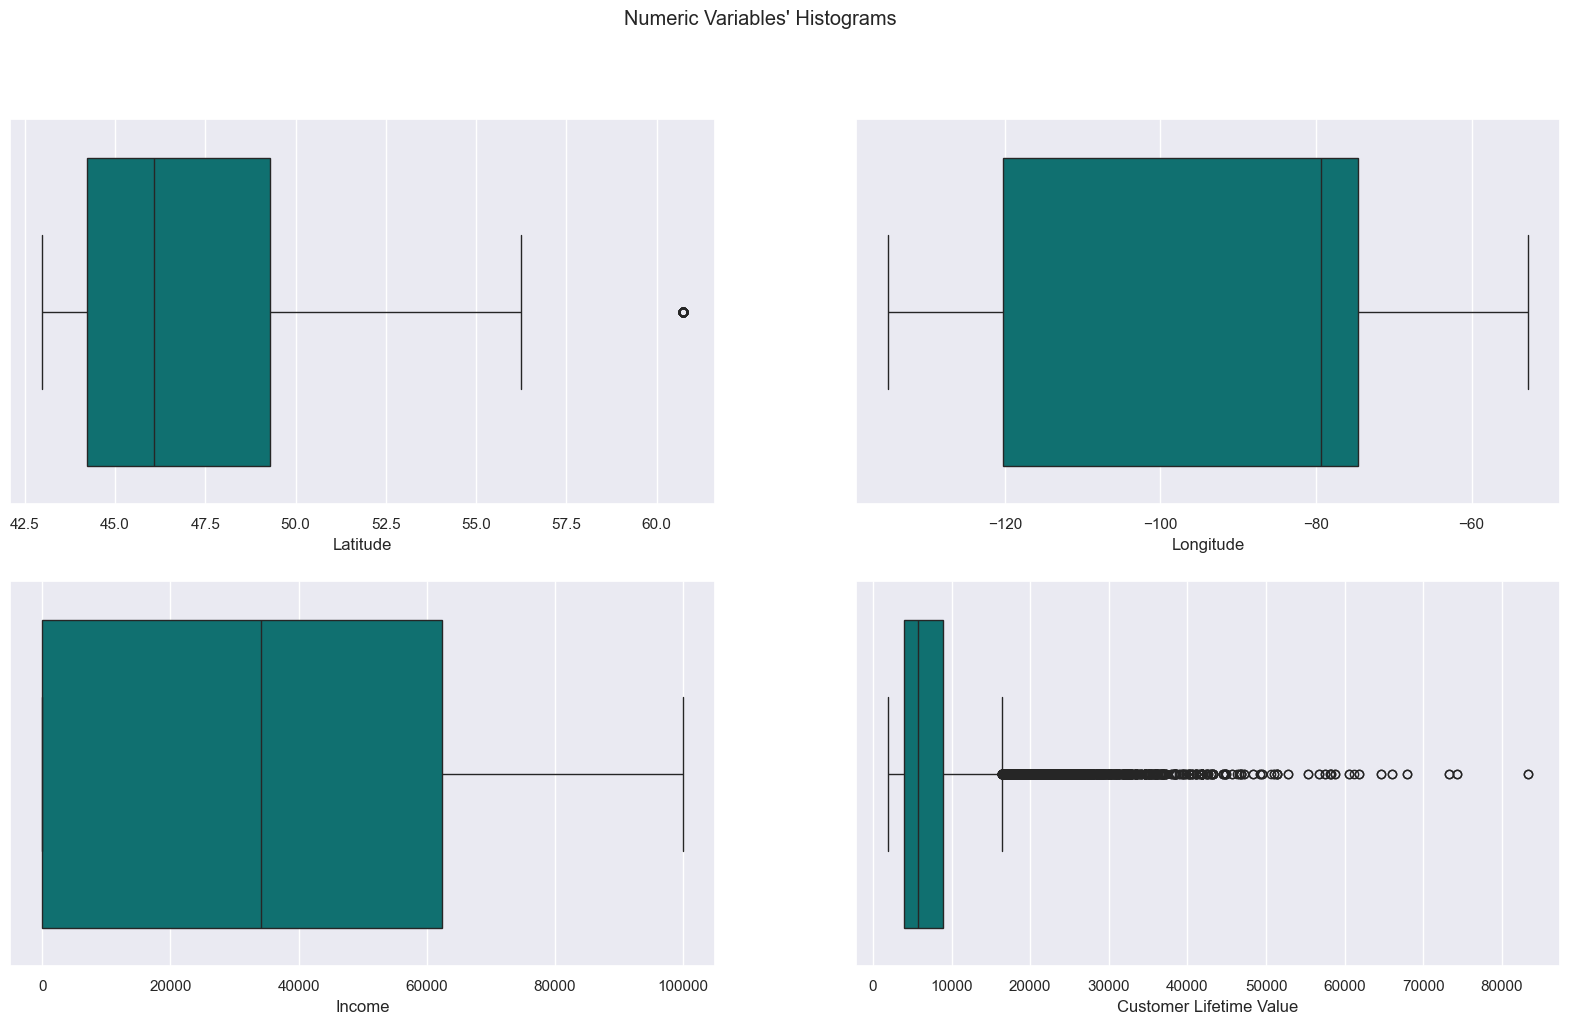

In [87]:
sns.set()

# We will put all the numeric variables' histograms in one figure
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(costumers_numerical) / 2 ), figsize = (20, 11))

for ax, feat in zip(axes.flatten(), costumers_numerical):
    sns.boxplot(x=customerDB[feat], ax=ax, color='teal')

# Add a centered title to the figure:
plt.suptitle("Numeric Variables' Histograms")

plt.show()

In [90]:
flights_numerical = flightsDB.columns.drop('YearMonthDate')

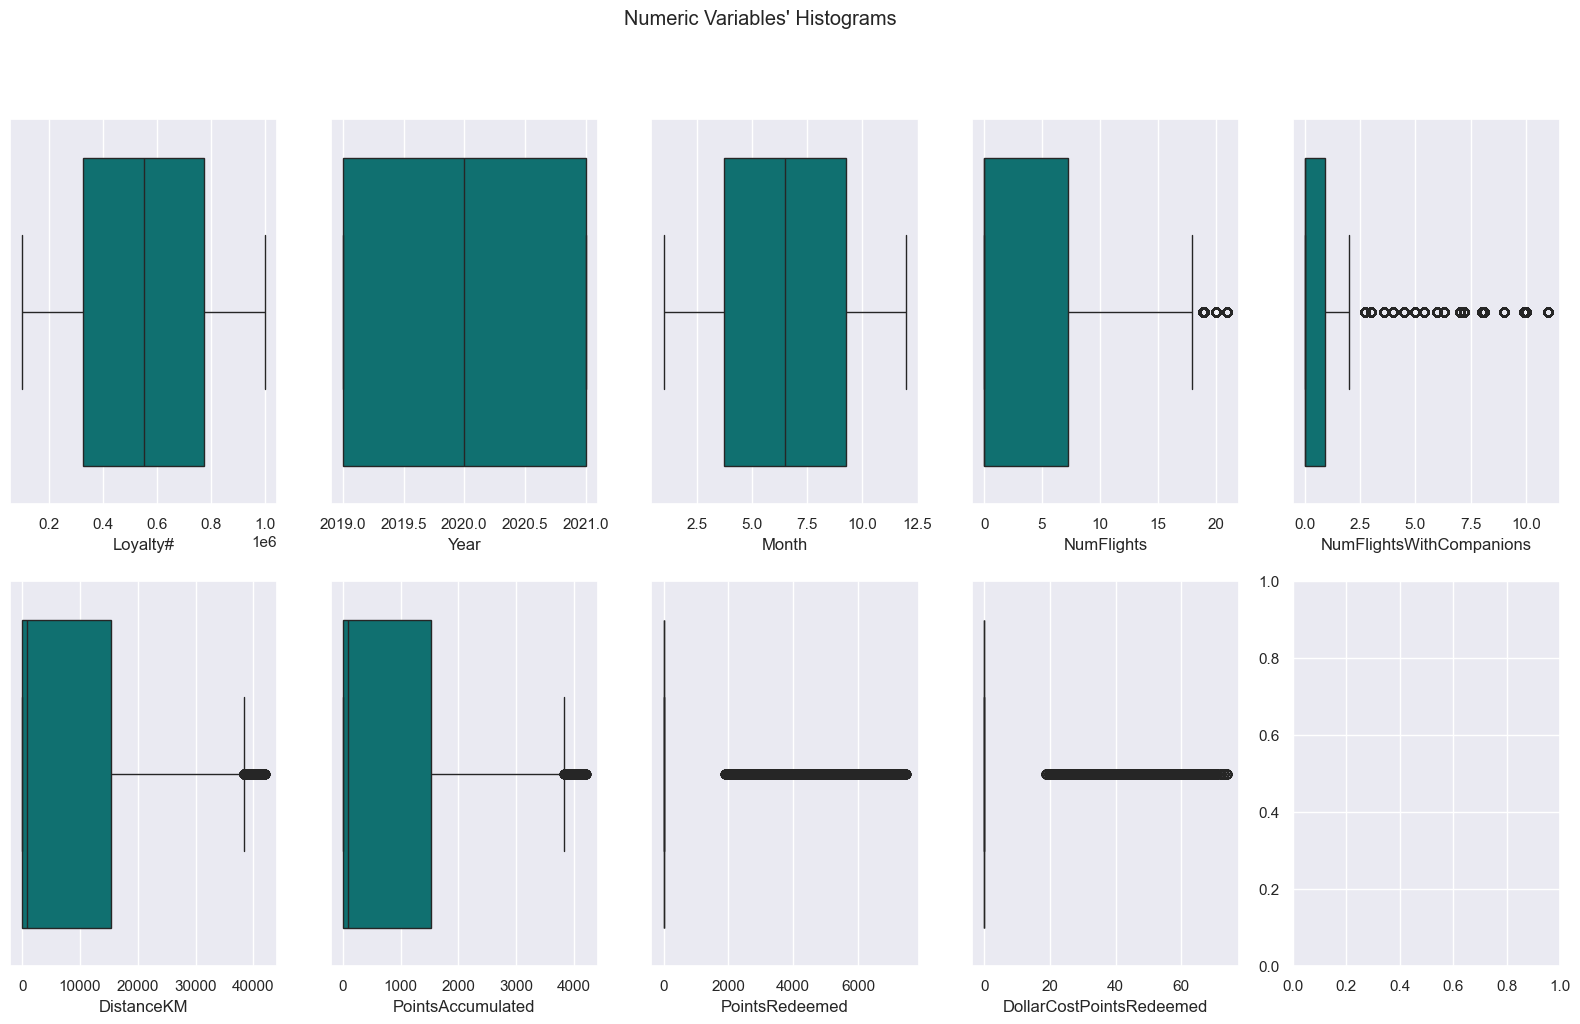

In [91]:

sns.set()

# We will put all the numeric variables' histograms in one figure
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(flights_numerical) / 2 ), figsize = (20, 11))

for ax, feat in zip(axes.flatten(), flights_numerical):
    sns.boxplot(x=flightsDB[feat], ax=ax, color='teal')

# Add a centered title to the figure:
plt.suptitle("Numeric Variables' Histograms")

plt.show()

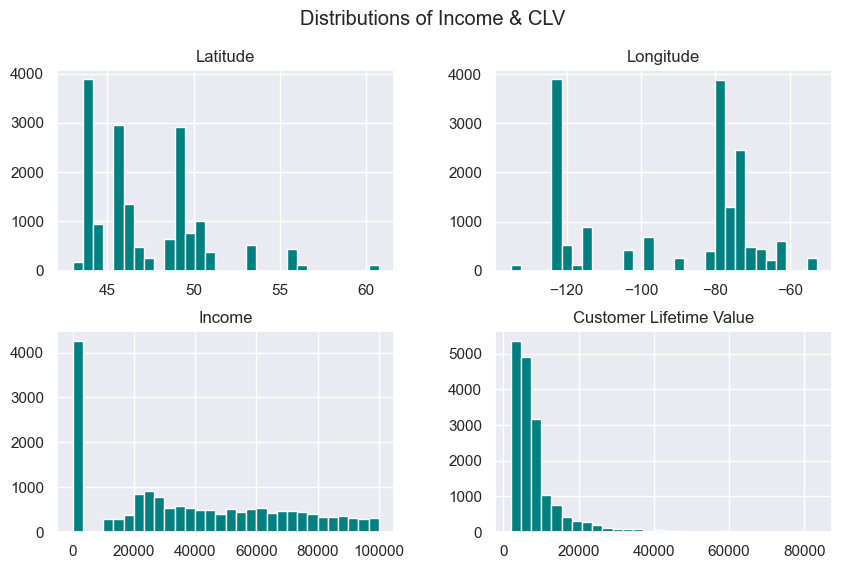

In [92]:
customerDB[costumers_numerical].hist(bins=30, figsize=(10,6), color='teal')
plt.suptitle("Distributions of Income & CLV")
plt.show()

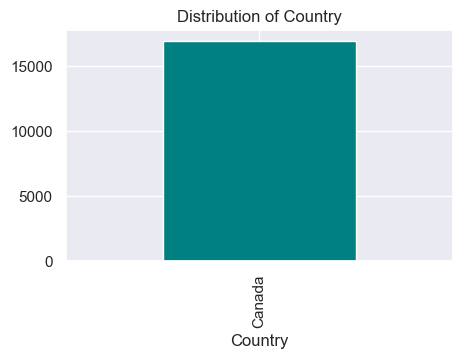

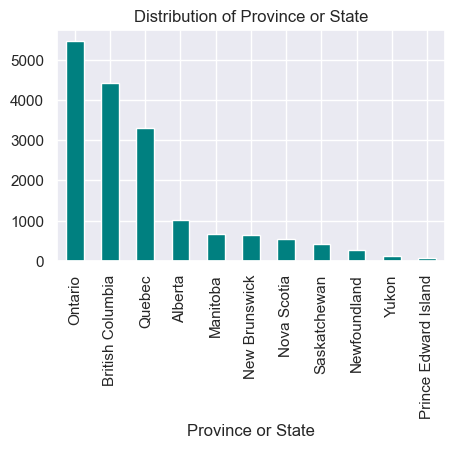

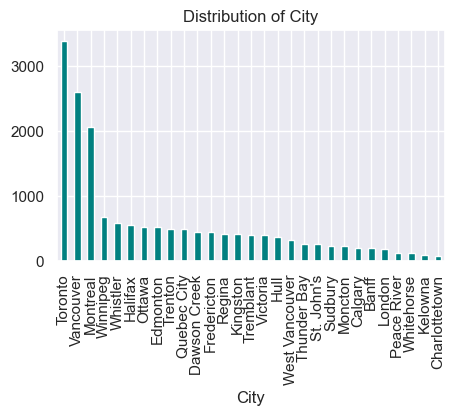

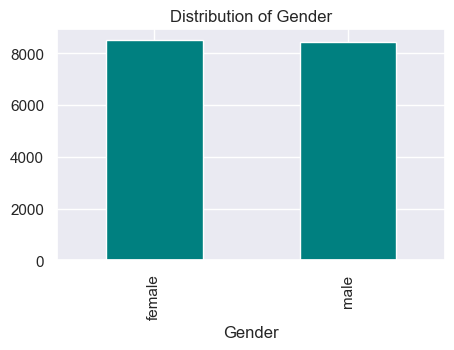

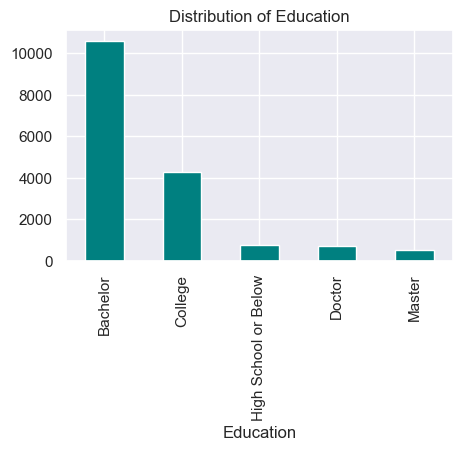

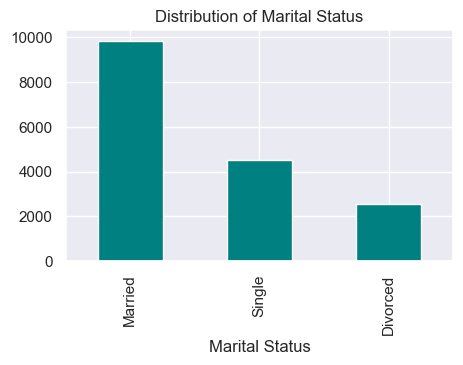

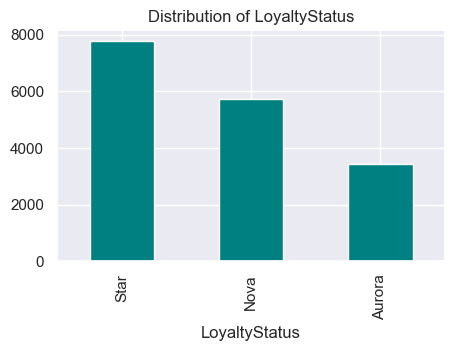

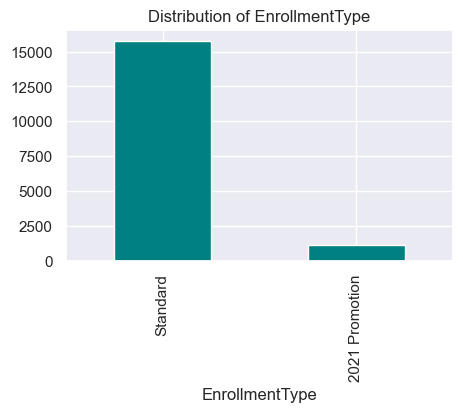

In [93]:
costumers_categories
for col in costumers_categories:
    plt.figure(figsize=(5,3))
    customerDB[col].value_counts().plot(kind='bar', color='teal')
    plt.title(f"Distribution of {col}")
    plt.show()

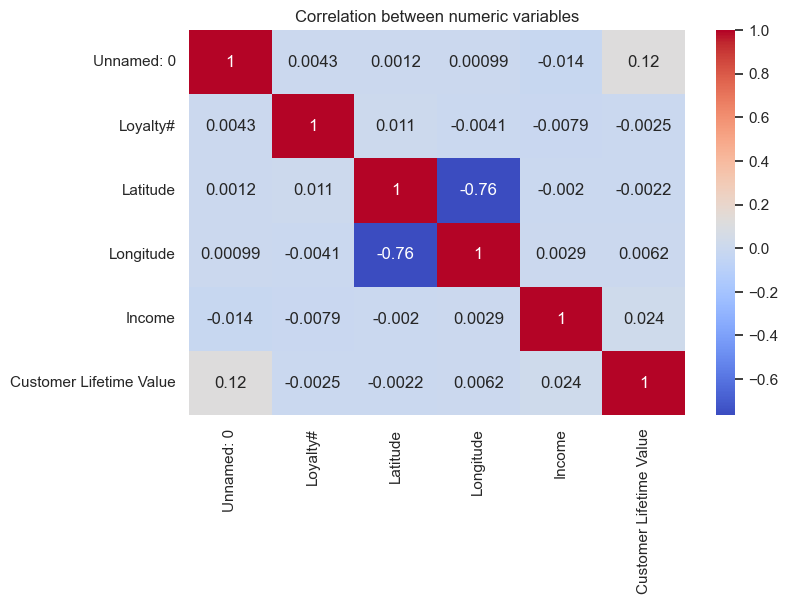

In [94]:
plt.figure(figsize=(8,5))
sns.heatmap(customerDB.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation between numeric variables")
plt.show()